<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/CreditScoring/Lab_Automobile_Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


## 2. Descargar y limpiar Dataset

In [334]:
# Principales librerías

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [335]:
# Cargar Data

import pandas as pd
pddf = pd.read_csv("Train_Dataset.csv")
pddf.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


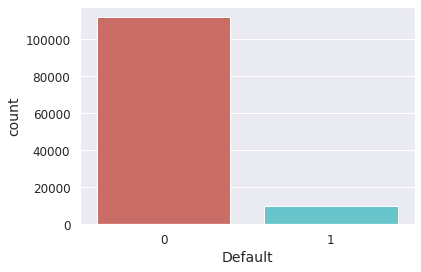

In [336]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [337]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID', 'ID_Days','Default']))
features

['Score_Source_1',
 'Type_Organization',
 'Age_Days',
 'Credit_Bureau',
 'Application_Process_Day',
 'Employed_Days',
 'Accompany_Client',
 'Car_Owned',
 'Client_Marital_Status',
 'Score_Source_2',
 'Client_Income',
 'Mobile_Tag',
 'Client_Gender',
 'Client_Occupation',
 'Cleint_City_Rating',
 'Client_Income_Type',
 'Loan_Contract_Type',
 'Social_Circle_Default',
 'Client_Contact_Work_Tag',
 'Active_Loan',
 'Client_Housing_Type',
 'Client_Education',
 'Application_Process_Hour',
 'House_Own',
 'Score_Source_3',
 'Bike_Owned',
 'Own_House_Age',
 'Registration_Days',
 'Loan_Annuity',
 'Client_Family_Members',
 'Credit_Amount',
 'Workphone_Working',
 'Child_Count',
 'Homephone_Tag',
 'Phone_Change',
 'Client_Permanent_Match_Tag',
 'Population_Region_Relative']

In [338]:
features_string = list(pddf.select_dtypes(include=['object']).columns)
features_string

['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization',
 'Score_Source_3']

In [339]:
pddf.convert_dtypes(infer_objects=True).dtypes 

ID                              Int64
Client_Income                  object
Car_Owned                       Int64
Bike_Owned                      Int64
Active_Loan                     Int64
House_Own                       Int64
Child_Count                     Int64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               string
Client_Income_Type             string
Client_Education               string
Client_Marital_Status          string
Client_Gender                  string
Loan_Contract_Type             string
Client_Housing_Type            string
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                   Int64
Mobile_Tag                      Int64
Homephone_Tag                   Int64
Workphone_Working               Int64
Client_Occupation              string
Client_Famil

In [340]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization']

In [341]:
numeric_features = list(set(features) - set(categorical_features))
numeric_features

['Score_Source_1',
 'Age_Days',
 'Credit_Bureau',
 'Application_Process_Day',
 'Employed_Days',
 'Car_Owned',
 'Score_Source_2',
 'Client_Income',
 'Mobile_Tag',
 'Cleint_City_Rating',
 'Social_Circle_Default',
 'Active_Loan',
 'Application_Process_Hour',
 'House_Own',
 'Score_Source_3',
 'Bike_Owned',
 'Own_House_Age',
 'Registration_Days',
 'Loan_Annuity',
 'Client_Family_Members',
 'Credit_Amount',
 'Workphone_Working',
 'Child_Count',
 'Homephone_Tag',
 'Phone_Change',
 'Population_Region_Relative']

In [342]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [343]:
# convert Series

for col in numeric_features:
  pddf[col] = pd.to_numeric(pddf[col])


In [344]:
pddf.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [345]:
# Determinando matrices de datos

X = pddf[features + ['ID', 'Default']]
y = pddf.Default


In [346]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 123)


## 3. Pre-selección de variables

In [347]:
# Estadísticos básicos

df_res = X_train[numeric_features].describe().transpose()
df_res.head()

,count,mean,std,min,25%,50%,75%,max
Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741
Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.00000,15736.00000,19671.000000,25201.000000
Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.00000,1.00000,3.000000,22.000000
Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.00000,3.00000,5.000000,6.000000
Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.00000,2211.00000,5625.000000,365243.000000


In [348]:
# Dando formato a la data

df_res.reset_index(inplace = True)
df_res.rename(columns = {'index': 'feature',
                         '25%': 'Q1',
                         '50%': 'Median',
                         '75%': 'Q3'}, inplace = True)
df_res.head()

,feature,count,mean,std,min,Q1,Median,Q3,max
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.00000,15736.00000,19671.000000,25201.000000
2,Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.00000,1.00000,3.000000,22.000000
3,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.00000,3.00000,5.000000,6.000000
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.00000,2211.00000,5625.000000,365243.000000


In [349]:
# Calculando el porcentaje de missings

df_res['missing_rate'] = 1 - df_res['count']/pddf.shape[0]
df_res.head()


,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741,0.695296
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.00000,15736.00000,19671.000000,25201.000000,0.320633
2,Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.00000,1.00000,3.000000,22.000000,0.406357
3,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.00000,3.00000,5.000000,6.000000,0.313903
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.00000,2211.00000,5625.000000,365243.000000,0.320830


In [350]:
#Calculando el gini univariado de todas las variables

ginisZero = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in numeric_features]


In [351]:
temp = X_train.copy()
temp['y'] = y_train

ginisNan = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in numeric_features]


In [352]:
res_ginis = pd.DataFrame({'feature' : numeric_features,
                          'giniZero' : ginisZero,
                          'giniNan'  : ginisNan})

In [353]:
df_res2 = pd.merge(df_res, res_ginis, on = 'feature', how='left')
df_res2.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.33275,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.00000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875
2,Credit_Bureau,72339.0,1.892313,1.862089,0.000000,0.00000,1.00000,3.000000,22.000000,0.406357,0.001208,0.035580
3,Application_Process_Day,83605.0,3.162801,1.758039,0.000000,2.00000,3.00000,5.000000,6.000000,0.313903,0.012773,0.013655
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.00000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437


In [354]:
# Ordenando variables por importancia de explicación

df_res2['abs_giniZero'] = df_res2.giniZero.apply(lambda x: abs(x))
df_res2['abs_giniNan'] = df_res2.giniNan.apply(lambda x: abs(x))

df_res2['abs_ginimax'] = df_res2[['abs_giniZero', 'abs_giniNan']].max(axis = 1)
df_res2.sort_values('abs_ginimax', ascending = False)


,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875
16,Own_House_Age,29326.0,12.214690,12.136193,0.000000,5.000000,9.00000,15.000000,69.000000,0.759339,-0.028796,0.130995,0.028796,0.130995,0.130995
24,Phone_Change,82764.0,963.112066,827.365281,0.000000,273.000000,756.00000,1575.000000,4185.000000,0.320805,-0.113137,-0.116412,0.113137,0.116412,0.116412
10,Social_Circle_Default,42004.0,0.116864,0.107001,0.000000,0.057700,0.08760,0.148500,1.000000,0.655298,-0.097401,-0.083640,0.097401,0.083640,0.097401
9,Cleint_City_Rating,83633.0,2.030443,0.504363,1.000000,2.000000,2.00000,2.000000,3.000000,0.313674,0.090308,0.094014,0.090308,0.094014,0.094014
17,Registration_Days,82748.0,4980.901146,3517.494509,0.000000,2000.000000,4496.00000,7470.000000,23738.000000,0.320936,-0.068334,-0.075461,0.068334,0.075461,0.075461


In [355]:
df_res2.to_csv('univariate_assesment.csv', index = 0)

## 4. Tratamiento de variables categóricas

In [356]:
categorical_features

['Accompany_Client',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Occupation',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Type_Organization']

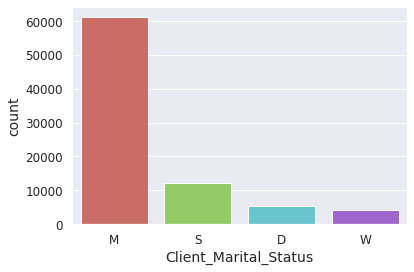

In [357]:
# Analizando variable categórica
sns.countplot(x='Client_Marital_Status', data = X_train, palette = 'hls')

In [358]:
mar_res = X_train.groupby(['Client_Marital_Status']).agg({"ID":"count",
                                                "Default" :"mean"}).reset_index()
mar_res                                                

,Client_Marital_Status,ID,Default
0,D,5288,0.076021
1,M,61181,0.079208
2,S,12110,0.097770
3,W,4329,0.063525


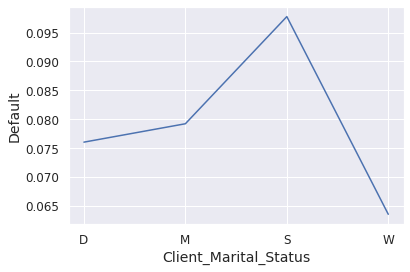

In [359]:
sns.lineplot(x = 'Client_Marital_Status', y = 'Default', data = mar_res)

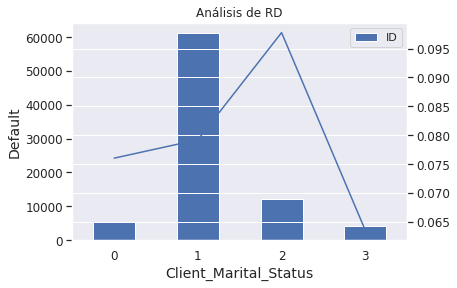

In [360]:
# Title
plt.title('Análisis de RD')
# X label
plt.xlabel('Client_Marital_Status')
# Y label
plt.ylabel('Default')


ax = mar_res['Default'].plot(secondary_y = True)
mar_res[['Client_Marital_Status','ID']].plot(kind='bar', ax=ax)


#### Encoding de variables categóricas


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [361]:
# Reemplazar las filas NaN por una categoría específica para missings 

X_train[categorical_features].fillna('missing', inplace = True)
X_train[categorical_features] = X_train[categorical_features].replace(np.nan,'missing')

X_train[categorical_features].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,missing
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,Business Entity Type 2
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,Self-employed
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,Self-employed
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,Trade: type 3


<h3>One Hot Encoding</h3> 

In [362]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()


In [363]:
# definiendo reglas de encoding

OneHotEncoder.fit(X_train[categorical_features])


OneHotEncoder()

In [364]:
list_dummys = []
for c in categorical_features:
  list_dummys += [c + '_dum' + str(x) for x in range(len(X_train[c].drop_duplicates()))]


In [365]:
list_dummys


['Accompany_Client_dum0',
 'Accompany_Client_dum1',
 'Accompany_Client_dum2',
 'Accompany_Client_dum3',
 'Accompany_Client_dum4',
 'Accompany_Client_dum5',
 'Accompany_Client_dum6',
 'Accompany_Client_dum7',
 'Client_Income_Type_dum0',
 'Client_Income_Type_dum1',
 'Client_Income_Type_dum2',
 'Client_Income_Type_dum3',
 'Client_Income_Type_dum4',
 'Client_Income_Type_dum5',
 'Client_Income_Type_dum6',
 'Client_Income_Type_dum7',
 'Client_Education_dum0',
 'Client_Education_dum1',
 'Client_Education_dum2',
 'Client_Education_dum3',
 'Client_Education_dum4',
 'Client_Education_dum5',
 'Client_Marital_Status_dum0',
 'Client_Marital_Status_dum1',
 'Client_Marital_Status_dum2',
 'Client_Marital_Status_dum3',
 'Client_Marital_Status_dum4',
 'Client_Gender_dum0',
 'Client_Gender_dum1',
 'Client_Gender_dum2',
 'Loan_Contract_Type_dum0',
 'Loan_Contract_Type_dum1',
 'Loan_Contract_Type_dum2',
 'Client_Housing_Type_dum0',
 'Client_Housing_Type_dum1',
 'Client_Housing_Type_dum2',
 'Client_Housing_

In [366]:
# Usando reglas de encoding

X_train[list_dummys] = OneHotEncoder.transform(X_train[categorical_features]).toarray()
X_train[categorical_features + list_dummys].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,...,Type_Organization_dum48,Type_Organization_dum49,Type_Organization_dum50,Type_Organization_dum51,Type_Organization_dum52,Type_Organization_dum53,Type_Organization_dum54,Type_Organization_dum55,Type_Organization_dum56,Type_Organization_dum57
66289,Alone,Commercial,Secondary,M,Male,CL,Home,missing,Yes,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109009,Relative,Commercial,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30526,Alone,Service,Graduation,M,Male,CL,Home,missing,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117872,Alone,Service,Secondary,M,Male,CL,Home,Core,Yes,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90866,Alone,Service,Secondary,M,Male,CL,missing,Sales,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [367]:
X_train[[x for x in X_train.columns.tolist() if 'Marital_Status' in x]].drop_duplicates()

,Client_Marital_Status,Client_Marital_Status_dum0,Client_Marital_Status_dum1,Client_Marital_Status_dum2,Client_Marital_Status_dum3,Client_Marital_Status_dum4
66289,M,0.0,1.0,0.0,0.0,0.0
7076,S,0.0,0.0,1.0,0.0,0.0
81616,D,1.0,0.0,0.0,0.0,0.0
114150,W,0.0,0.0,0.0,1.0,0.0
80118,missing,0.0,0.0,0.0,0.0,1.0


In [368]:
X_train.shape

(85299, 160)

<h3>Target Encoding</h3> 

In [369]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [370]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()



/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [371]:
# definiendo reglas de encoding

TargetEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [372]:
# Usando reglas de encoding

X_train[[x + '_num' for x in categorical_features]] = TargetEncoder.transform(X_train[categorical_features])


In [373]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num
66289,Male,0.0,1.0,0.0,0.070758
7076,Female,1.0,0.0,0.0,0.100146
80118,missing,0.0,0.0,1.0,0.077497


<h3>WOE Encoding</h3> 

In [374]:
# Target Encoding

from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()


In [375]:
# definiendo reglas de encoding

WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [376]:
# Usando reglas de encoding

X_train[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_train[categorical_features])


In [377]:
#X_test[categorical_features].fillna('missing', inplace = True)
#X_test[categorical_features] = X_test[categorical_features].replace(np.nan,'missing')

#X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])
                                                                          

In [378]:
X_train[['Client_Gender','Client_Gender_woe']].drop_duplicates().head()

,Client_Gender,Client_Gender_woe
66289,Male,-0.143422
7076,Female,0.236154
80118,missing,-0.038646


In [379]:
#Analizamos resultados

X_train[[x for x in X_train.columns.tolist() if 'Client_Gender' in x] ].drop_duplicates().head()


,Client_Gender,Client_Gender_dum0,Client_Gender_dum1,Client_Gender_dum2,Client_Gender_num,Client_Gender_woe
66289,Male,0.0,1.0,0.0,0.070758,-0.143422
7076,Female,1.0,0.0,0.0,0.100146,0.236154
80118,missing,0.0,0.0,1.0,0.077497,-0.038646


In [380]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_num)*2-1

0.08893367136772024

In [381]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_woe)*2-1

0.08893367136772024

In [382]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum0)*2-1

0.08774192299640515

In [383]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum1)*2-1

-0.08683733595014442

In [384]:
sklearn.metrics.roc_auc_score(X_train.Default, X_train.Client_Gender_dum2)*2-1

-0.0009045870462606187

## 5. Tratamiento de variables numéricas




In [385]:
numeric_features

['Score_Source_1',
 'Age_Days',
 'Credit_Bureau',
 'Application_Process_Day',
 'Employed_Days',
 'Car_Owned',
 'Score_Source_2',
 'Client_Income',
 'Mobile_Tag',
 'Cleint_City_Rating',
 'Social_Circle_Default',
 'Active_Loan',
 'Application_Process_Hour',
 'House_Own',
 'Score_Source_3',
 'Bike_Owned',
 'Own_House_Age',
 'Registration_Days',
 'Loan_Annuity',
 'Client_Family_Members',
 'Credit_Amount',
 'Workphone_Working',
 'Child_Count',
 'Homephone_Tag',
 'Phone_Change',
 'Population_Region_Relative']

In [386]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

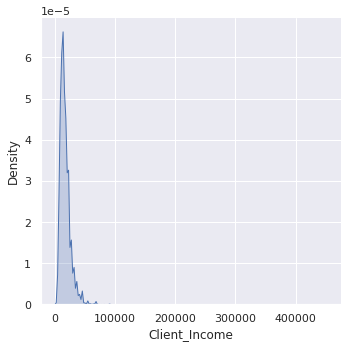

In [387]:
#sns.displot(X_train, x = 'Client_Income', bins=20)
sns.displot(X_train, x = "Client_Income", kind="kde", fill=True)

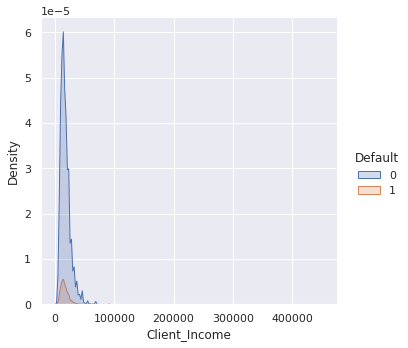

In [388]:
sns.displot(X_train, x="Client_Income", hue='Default', kind="kde", fill=True)

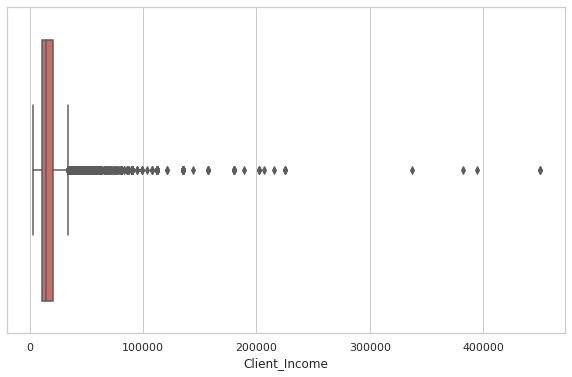

In [389]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Client_Income", data = X_train, palette = 'hls')

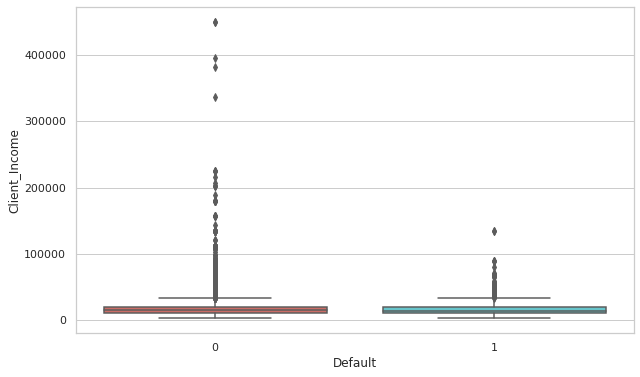

In [390]:
ax = sns.boxplot(x="Default", y="Client_Income", data=X_train, palette = 'hls')


### Tratamiento de outliers

<h3>Outliers por Rango Intercuantílico</h3> 

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

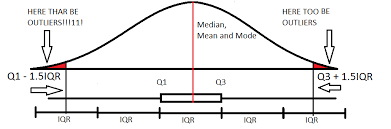 

In [391]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv').sort_values(by = 'abs_ginimax', ascending = False)
univariate_II = univariate_II.loc[univariate_II.abs_ginimax > 0.025]

univariate_II.head() 

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875


In [392]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,ric,min_ric,max_ric
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.295124,-0.070352,1.110144
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.340597,-0.178145,1.184242
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939,0.273075,-0.018698,1.073603
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437,4694.000000,-6110.000000,12666.000000
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875,7272.000000,1491.000000,30579.000000


In [393]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

,Score_Source_1,Type_Organization,Age_Days,Credit_Bureau,Application_Process_Day,Employed_Days,Accompany_Client,Car_Owned,Client_Marital_Status,Score_Source_2,...,Registration_Days_tric,Population_Region_Relative_tric,Application_Process_Hour_tric,Car_Owned_tric,Workphone_Working_tric,Credit_Amount_tric,Client_Income_tric,Credit_Bureau_tric,Child_Count_tric,Homephone_Tag_tric
66289,NaN,missing,21389.0,3.0,1.0,1121.0,Alone,0.0,M,0.673780,...,90.0,0.028663,12.0,0.0,0,161662.50,14400.0,3.0,0.0,0.0
109009,0.464453,Business Entity Type 2,10682.0,NaN,5.0,3750.0,Relative,0.0,M,0.638836,...,2684.0,0.030755,18.0,0.0,0,15282.00,6750.0,NaN,1.0,0.0
30526,0.572723,Self-employed,12044.0,2.0,4.0,3579.0,Alone,0.0,M,0.679607,...,5614.0,0.035792,15.0,0.0,1,49752.00,NaN,2.0,1.0,0.0
117872,NaN,Self-employed,17323.0,5.0,4.0,1336.0,Alone,1.0,M,0.475857,...,506.0,0.014520,12.0,1.0,0,112500.00,11250.0,5.0,0.0,0.0
90866,NaN,Trade: type 3,12340.0,0.0,0.0,111.0,Alone,0.0,M,0.434370,...,4813.0,0.008866,11.0,0.0,0,122790.15,10800.0,0.0,0.0,0.0


Revisemos los resultados

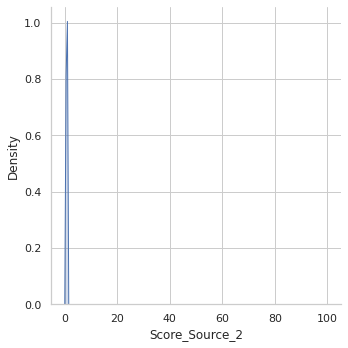

In [394]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

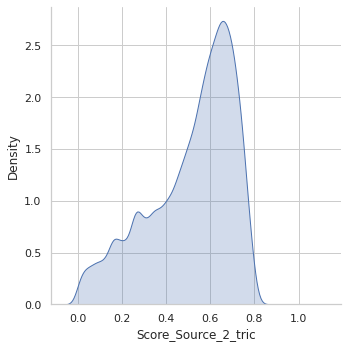

In [395]:
sns.displot(X_train, x = "Score_Source_2_tric", kind="kde", fill=True)

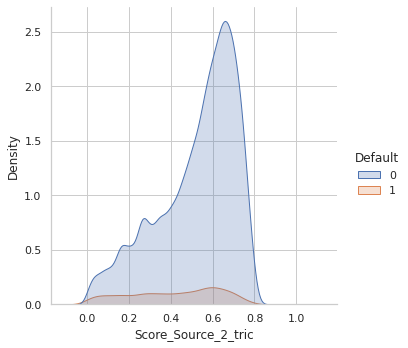

In [396]:
sns.displot(X_train, x="Score_Source_2_tric", hue='Default', kind="kde", fill=True)

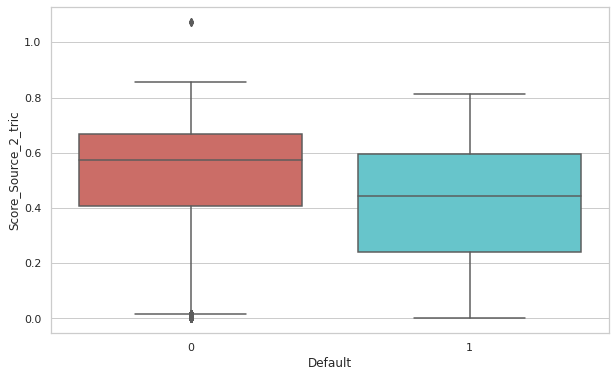

In [397]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tric", data=X_train, palette = 'hls')

<h3>Outliers por Z-score</h3> 



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [398]:
univariate_II.head()

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,ric,min_ric,max_ric
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.295124,-0.070352,1.110144
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.340597,-0.178145,1.184242
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939,0.273075,-0.018698,1.073603
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437,4694.000000,-6110.000000,12666.000000
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875,7272.000000,1491.000000,30579.000000


In [399]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

,feature,count,mean,std,min,Q1,Median,Q3,max,missing_rate,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,ric,min_ric,max_ric,min_zscore,max_zscore
14,Score_Source_3,66516.0,0.511120,0.194368,0.000527,0.372334,0.53707,0.667458,0.896010,0.454143,-0.225921,-0.342416,0.225921,0.342416,0.342416,0.295124,-0.070352,1.110144,-0.071985,1.094224
0,Score_Source_1,37130.0,0.500320,0.211204,0.014568,0.332750,0.50333,0.673347,0.945741,0.695296,-0.097251,-0.316251,0.097251,0.316251,0.316251,0.340597,-0.178145,1.184242,-0.133293,1.133932
6,Score_Source_2,81359.0,0.518766,0.723443,0.000005,0.390915,0.56544,0.663990,100.000000,0.332335,-0.273964,-0.303939,0.273964,0.303939,0.303939,0.273075,-0.018698,1.073603,-1.651562,2.689093
4,Employed_Days,82761.0,67160.180641,138977.268774,0.000000,931.000000,2211.00000,5625.000000,365243.000000,0.320830,-0.172016,-0.183437,0.172016,0.183437,0.183437,4694.000000,-6110.000000,12666.000000,-349771.625681,484091.986962
1,Age_Days,82785.0,16030.353482,4367.969719,7676.000000,12399.000000,15736.00000,19671.000000,25201.000000,0.320633,-0.146395,-0.155875,0.146395,0.155875,0.155875,7272.000000,1491.000000,30579.000000,2926.444325,29134.262639


In [400]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

,Score_Source_1,Type_Organization,Age_Days,Credit_Bureau,Application_Process_Day,Employed_Days,Accompany_Client,Car_Owned,Client_Marital_Status,Score_Source_2,...,Registration_Days_tzscore,Population_Region_Relative_tzscore,Application_Process_Hour_tzscore,Car_Owned_tzscore,Workphone_Working_tzscore,Credit_Amount_tzscore,Client_Income_tzscore,Credit_Bureau_tzscore,Child_Count_tzscore,Homephone_Tag_tzscore
66289,NaN,missing,21389.0,3.0,1.0,1121.0,Alone,0.0,M,0.673780,...,90.0,0.028663,12.0,0.0,0,180000.00,14400.0,3.0,0.0,0
109009,0.464453,Business Entity Type 2,10682.0,NaN,5.0,3750.0,Relative,0.0,M,0.638836,...,2684.0,0.030755,18.0,0.0,0,15282.00,6750.0,NaN,1.0,0
30526,0.572723,Self-employed,12044.0,2.0,4.0,3579.0,Alone,0.0,M,0.679607,...,5614.0,0.035792,15.0,0.0,1,49752.00,NaN,2.0,1.0,0
117872,NaN,Self-employed,17323.0,5.0,4.0,1336.0,Alone,1.0,M,0.475857,...,506.0,0.014520,12.0,1.0,0,112500.00,11250.0,5.0,0.0,0
90866,NaN,Trade: type 3,12340.0,0.0,0.0,111.0,Alone,0.0,M,0.434370,...,4813.0,0.008866,11.0,0.0,0,122790.15,10800.0,0.0,0.0,0


Revisemos los resultados

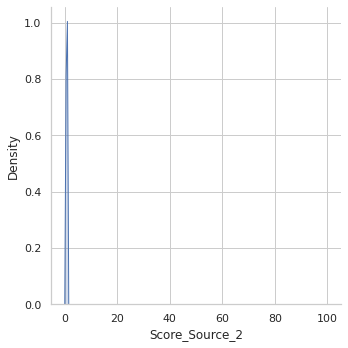

In [401]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

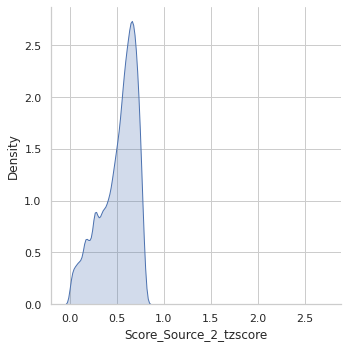

In [402]:
sns.displot(X_train, x = "Score_Source_2_tzscore", kind="kde", fill=True)

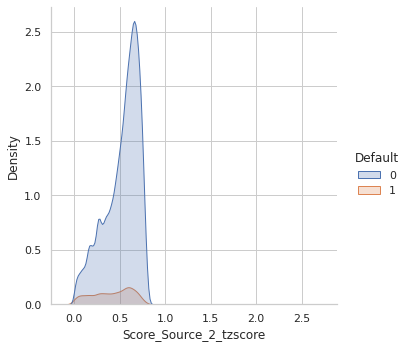

In [403]:
sns.displot(X_train, x="Score_Source_2_tzscore", hue='Default', kind="kde", fill=True)

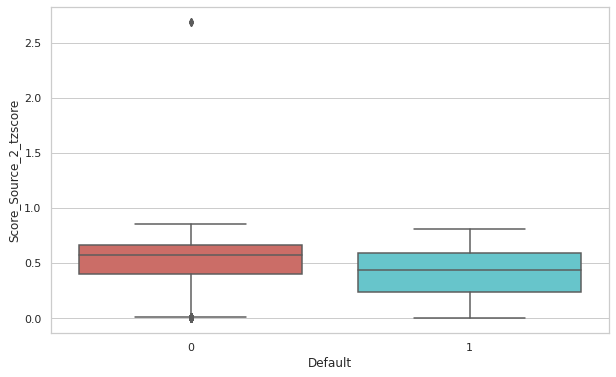

In [404]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tzscore", data=X_train, palette = 'hls')

In [405]:
#Calculando el gini univariado de todas las variables

features_outtreat_zscore = [x  + '_tzscore' for x in univariate_II.feature.tolist()]
features_outtreat_tric = [x  + '_tric' for x in univariate_II.feature.tolist()]


In [406]:
#Calculando el gini univariado de todas las variables

ginisZeroZscore = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_zscore]
ginisZeroTric = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_tric]


In [407]:
temp = X_train.copy()
temp['y'] = y_train

ginisNanZscore = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_zscore]
ginisNanTric = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_tric]


In [408]:
res_ginis2 = pd.DataFrame({'feature' : univariate_II.feature.tolist(),
                          'giniZeroZscore' : ginisZeroZscore,
                          'giniZeroTric' : ginisZeroTric,
                          'giniNanZscore' : ginisNanZscore,
                          'giniNanTric'  : ginisNanTric})

In [409]:
univariate_III = pd.merge(univariate_II, res_ginis2, on = 'feature', how='left')
univariate_III[['feature'] + [x for x in univariate_III.columns.tolist() if 'gini' in x]].head(10)

,feature,giniZero,giniNan,abs_giniZero,abs_giniNan,abs_ginimax,giniZeroZscore,giniZeroTric,giniNanZscore,giniNanTric
0,Score_Source_3,-0.225921,-0.342416,0.225921,0.342416,0.342416,-0.225921,-0.225921,-0.342416,-0.342416
1,Score_Source_1,-0.097251,-0.316251,0.097251,0.316251,0.316251,-0.097251,-0.097251,-0.316251,-0.316251
2,Score_Source_2,-0.273964,-0.303939,0.273964,0.303939,0.303939,-0.273964,-0.273964,-0.303939,-0.303939
3,Employed_Days,-0.172016,-0.183437,0.172016,0.183437,0.183437,-0.172016,-0.172330,-0.183437,-0.183771
4,Age_Days,-0.146395,-0.155875,0.146395,0.155875,0.155875,-0.146395,-0.146395,-0.155875,-0.155875
5,Own_House_Age,-0.028796,0.130995,0.028796,0.130995,0.130995,-0.028781,-0.028818,0.131134,0.130786
6,Phone_Change,-0.113137,-0.116412,0.113137,0.116412,0.116412,-0.113137,-0.113137,-0.116413,-0.116412
7,Social_Circle_Default,-0.097401,-0.083640,0.097401,0.083640,0.097401,-0.097399,-0.097360,-0.083631,-0.083443
8,Cleint_City_Rating,0.090308,0.094014,0.090308,0.094014,0.094014,0.090308,-0.000065,0.094014,0.000000
9,Registration_Days,-0.068334,-0.075461,0.068334,0.075461,0.075461,-0.068335,-0.068335,-0.075462,-0.075462


### Transformación de variables numéricas

<h3> Tratamiendo por WOE </h3>

In [410]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric' in x]

In [411]:
f_numeric_features

['Score_Source_3_tric',
 'Score_Source_1_tric',
 'Score_Source_2_tric',
 'Employed_Days_tric',
 'Age_Days_tric',
 'Own_House_Age_tric',
 'Phone_Change_tric',
 'Social_Circle_Default_tric',
 'Cleint_City_Rating_tric',
 'Registration_Days_tric',
 'Population_Region_Relative_tric',
 'Application_Process_Hour_tric',
 'Car_Owned_tric',
 'Workphone_Working_tric',
 'Credit_Amount_tric',
 'Client_Income_tric',
 'Credit_Bureau_tric',
 'Child_Count_tric',
 'Homephone_Tag_tric']

In [412]:
X_train.Score_Source_3_tric.mean()

0.5111198154771485

In [413]:
X_train.Score_Source_3_tric.fillna(X_train.Score_Source_3_tric.mean())

66289     0.324891
109009    0.511120
30526     0.286652
117872    0.344155
90866     0.239226
            ...   
7611      0.382502
9256      0.511120
8612      0.413597
4291      0.511120
16809     0.266457
Name: Score_Source_3_tric, Length: 85299, dtype: float64

In [414]:
# Tratamiento de missings

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_mean = imp_mean.fit(X_train[f_numeric_features])


In [415]:

X_train[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_train[f_numeric_features])
X_train[[x + '_imp' for x in f_numeric_features]].head()


,Score_Source_3_tric_imp,Score_Source_1_tric_imp,Score_Source_2_tric_imp,Employed_Days_tric_imp,Age_Days_tric_imp,Own_House_Age_tric_imp,Phone_Change_tric_imp,Social_Circle_Default_tric_imp,Cleint_City_Rating_tric_imp,Registration_Days_tric_imp,Population_Region_Relative_tric_imp,Application_Process_Hour_tric_imp,Car_Owned_tric_imp,Workphone_Working_tric_imp,Credit_Amount_tric_imp,Client_Income_tric_imp,Credit_Bureau_tric_imp,Child_Count_tric_imp,Homephone_Tag_tric_imp
66289,0.324891,0.503330,0.673780,1121.0,21389.0,9.0,2193.0,0.0876,2.0,90.0,0.028663,12.0,0.0,0.0,161662.50,14400.0,3.0,0.0,0.0
109009,0.537070,0.464453,0.638836,3750.0,10682.0,9.0,1966.0,0.1191,2.0,2684.0,0.030755,18.0,0.0,0.0,15282.00,6750.0,1.0,1.0,0.0
30526,0.286652,0.572723,0.679607,3579.0,12044.0,9.0,2572.0,0.0381,2.0,5614.0,0.035792,15.0,0.0,1.0,49752.00,14760.0,2.0,1.0,0.0
117872,0.344155,0.503330,0.475857,1336.0,17323.0,13.0,576.0,0.0876,2.0,506.0,0.014520,12.0,1.0,0.0,112500.00,11250.0,5.0,0.0,0.0
90866,0.239226,0.503330,0.434370,111.0,12340.0,9.0,491.0,0.0247,2.0,4813.0,0.008866,11.0,0.0,0.0,122790.15,10800.0,0.0,0.0,0.0


In [416]:
# Discretizar variables

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(X_train[[x + '_imp' for x in f_numeric_features]])


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:195: UserWarning: Feature 8 is constant and will be replaced with 0.
  "Feature %d is constant and will be replaced with 0." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:195: UserWarning: Feature 18 is constant and will be replaced with 0.
  "Feature %d is constant and will be replaced with 0." % jj


In [417]:
# Creando variables discretizadas

X_train[[x + '_discret' for x in f_numeric_features]] = discretizer.transform(X_train[[x + '_imp' for x in f_numeric_features]])

for col in [x + '_discret' for x in f_numeric_features]:
  X_train[col] = X_train[col].astype('category')


In [418]:
X_train[[x + '_discret' for x in f_numeric_features]].head()

,Score_Source_3_tric_discret,Score_Source_1_tric_discret,Score_Source_2_tric_discret,Employed_Days_tric_discret,Age_Days_tric_discret,Own_House_Age_tric_discret,Phone_Change_tric_discret,Social_Circle_Default_tric_discret,Cleint_City_Rating_tric_discret,Registration_Days_tric_discret,Population_Region_Relative_tric_discret,Application_Process_Hour_tric_discret,Car_Owned_tric_discret,Workphone_Working_tric_discret,Credit_Amount_tric_discret,Client_Income_tric_discret,Credit_Bureau_tric_discret,Child_Count_tric_discret,Homephone_Tag_tric_discret
66289,3.0,5.0,6.0,0.0,7.0,3.0,6.0,3.0,0.0,0.0,5.0,5.0,0.0,0.0,9.0,3.0,4.0,0.0,0.0
109009,5.0,4.0,5.0,2.0,1.0,3.0,5.0,4.0,0.0,1.0,5.0,8.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0
30526,3.0,5.0,6.0,2.0,2.0,3.0,7.0,1.0,0.0,3.0,6.0,6.0,0.0,9.0,2.0,3.0,2.0,4.0,0.0
117872,3.0,5.0,4.0,1.0,5.0,4.0,1.0,3.0,0.0,0.0,2.0,5.0,9.0,0.0,6.0,2.0,6.0,0.0,0.0
90866,2.0,5.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0


In [419]:
# WOE Encoding

from category_encoders.woe import WOEEncoder
encoder2 = WOEEncoder()


In [420]:
# definiendo reglas de encoding

WOEEncoder2 = encoder2.fit(X_train[[x + '_discret' for x in f_numeric_features]], X_train['Default'])


In [421]:
# Usando reglas de encoding

X_train[[x + '_disc_woe' for x in f_numeric_features]] = WOEEncoder2.transform(X_train[[x + '_discret' for x in f_numeric_features]])


In [422]:
X_train[[x + '_disc_woe' for x in f_numeric_features]].head()

,Score_Source_3_tric_disc_woe,Score_Source_1_tric_disc_woe,Score_Source_2_tric_disc_woe,Employed_Days_tric_disc_woe,Age_Days_tric_disc_woe,Own_House_Age_tric_disc_woe,Phone_Change_tric_disc_woe,Social_Circle_Default_tric_disc_woe,Cleint_City_Rating_tric_disc_woe,Registration_Days_tric_disc_woe,Population_Region_Relative_tric_disc_woe,Application_Process_Hour_tric_disc_woe,Car_Owned_tric_disc_woe,Workphone_Working_tric_disc_woe,Credit_Amount_tric_disc_woe,Client_Income_tric_disc_woe,Credit_Bureau_tric_disc_woe,Child_Count_tric_disc_woe,Homephone_Tag_tric_disc_woe
66289,0.348547,0.043262,-0.661467,0.349585,-0.381511,0.053920,-0.371541,0.104952,-0.000132,0.133837,-0.077091,-0.011476,0.062780,0.057792,-0.714302,0.075455,-0.082755,-0.045707,-0.000132
109009,0.016607,-0.142293,-0.164506,-0.261150,0.276706,0.053920,-0.295849,-0.272430,-0.000132,0.043341,-0.077091,-0.206631,0.062780,0.057792,-0.149445,0.065294,0.049571,0.098806,-0.000132
30526,0.348547,0.043262,-0.661467,-0.261150,0.310590,0.053920,-0.534138,0.077192,-0.000132,0.081641,-0.125782,-0.027051,0.062780,-0.161328,0.208616,0.075455,0.012045,0.098806,-0.000132
117872,0.348547,0.043262,-0.033936,0.059852,-0.077725,-0.015689,0.139775,0.104952,-0.000132,0.133837,-0.026637,-0.011476,-0.136078,0.057792,-0.218556,0.050076,0.041182,-0.045707,-0.000132
90866,0.716140,0.043262,-0.033936,0.349585,0.310590,0.053920,0.139775,0.053921,-0.000132,0.081641,0.039866,-0.033646,0.062780,0.057792,-0.254920,0.050076,-0.109000,-0.045707,-0.000132


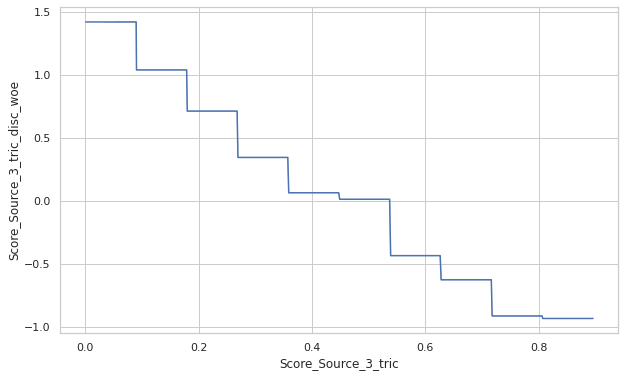

In [423]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe", palette = 'hls')

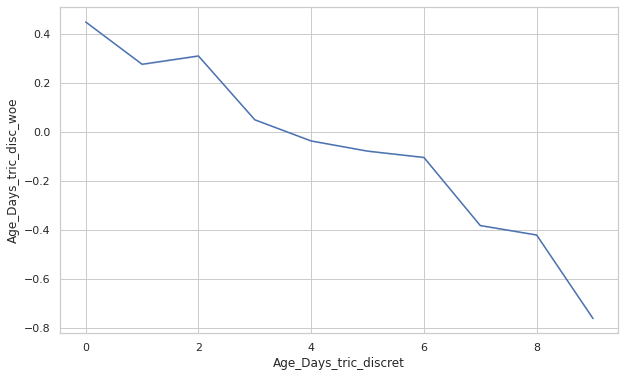

In [424]:
sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe", palette = 'hls')

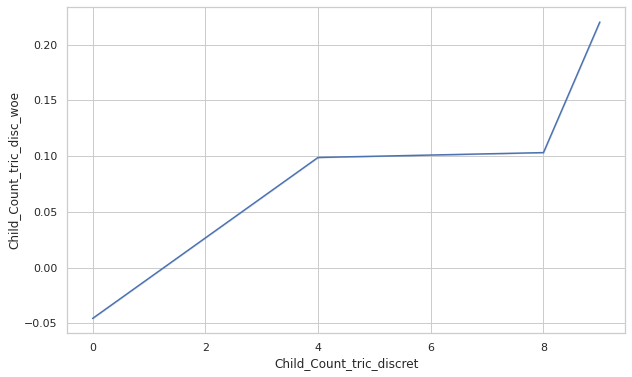

In [425]:
sns.lineplot(data=X_train, x="Child_Count_tric_discret", y="Child_Count_tric_disc_woe", palette = 'hls')

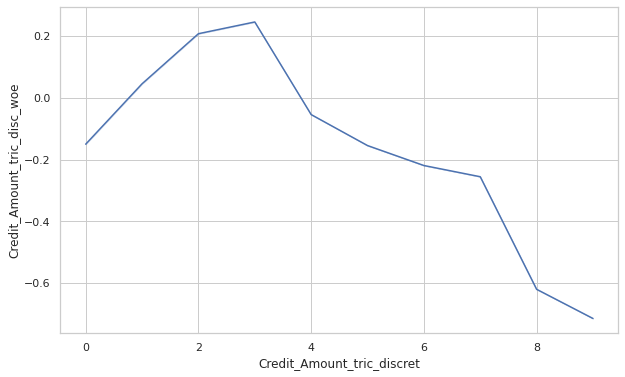

In [426]:
sns.lineplot(data=X_train, x="Credit_Amount_tric_discret", y="Credit_Amount_tric_disc_woe", palette = 'hls')

<h3> Tratamiendo por transformaciones </h3>

In [427]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric' in x[-5:]]
f_numeric_features

['Score_Source_3_tric',
 'Score_Source_1_tric',
 'Score_Source_2_tric',
 'Employed_Days_tric',
 'Age_Days_tric',
 'Own_House_Age_tric',
 'Phone_Change_tric',
 'Social_Circle_Default_tric',
 'Cleint_City_Rating_tric',
 'Registration_Days_tric',
 'Population_Region_Relative_tric',
 'Application_Process_Hour_tric',
 'Car_Owned_tric',
 'Workphone_Working_tric',
 'Credit_Amount_tric',
 'Client_Income_tric',
 'Credit_Bureau_tric',
 'Child_Count_tric',
 'Homephone_Tag_tric']

In [428]:
# Tratamiento de missings

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
imp_mean = imp_mean.fit(X_train[f_numeric_features])


In [429]:

X_train[[x + '_imp' for x in f_numeric_features]] = imp_mean.transform(X_train[f_numeric_features])
X_train[[x + '_imp' for x in f_numeric_features]].head()


,Score_Source_3_tric_imp,Score_Source_1_tric_imp,Score_Source_2_tric_imp,Employed_Days_tric_imp,Age_Days_tric_imp,Own_House_Age_tric_imp,Phone_Change_tric_imp,Social_Circle_Default_tric_imp,Cleint_City_Rating_tric_imp,Registration_Days_tric_imp,Population_Region_Relative_tric_imp,Application_Process_Hour_tric_imp,Car_Owned_tric_imp,Workphone_Working_tric_imp,Credit_Amount_tric_imp,Client_Income_tric_imp,Credit_Bureau_tric_imp,Child_Count_tric_imp,Homephone_Tag_tric_imp
66289,0.324891,0.503330,0.673780,1121.0,21389.0,9.0,2193.0,0.0876,2.0,90.0,0.028663,12.0,0.0,0.0,161662.50,14400.0,3.0,0.0,0.0
109009,0.537070,0.464453,0.638836,3750.0,10682.0,9.0,1966.0,0.1191,2.0,2684.0,0.030755,18.0,0.0,0.0,15282.00,6750.0,1.0,1.0,0.0
30526,0.286652,0.572723,0.679607,3579.0,12044.0,9.0,2572.0,0.0381,2.0,5614.0,0.035792,15.0,0.0,1.0,49752.00,14760.0,2.0,1.0,0.0
117872,0.344155,0.503330,0.475857,1336.0,17323.0,13.0,576.0,0.0876,2.0,506.0,0.014520,12.0,1.0,0.0,112500.00,11250.0,5.0,0.0,0.0
90866,0.239226,0.503330,0.434370,111.0,12340.0,9.0,491.0,0.0247,2.0,4813.0,0.008866,11.0,0.0,0.0,122790.15,10800.0,0.0,0.0,0.0


In [430]:
# Discretizar variables

from sklearn.preprocessing import KBinsDiscretizer

discretizer2 = KBinsDiscretizer(n_bins = 100, 
                                encode = 'ordinal',
                                strategy = "quantile").fit(X_train[[x + '_imp' for x in f_numeric_features]])


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

In [431]:
# Creando variables discretizadas

X_train[[x + '_discret2' for x in f_numeric_features]] = discretizer2.transform(X_train[[x + '_imp' for x in f_numeric_features]])

for col in [x + '_discret2' for x in f_numeric_features]:
  X_train[col] = X_train[col].astype('category')


In [432]:
# WOE Encoding

from category_encoders.woe import WOEEncoder
encoder3 = WOEEncoder()


In [433]:
# definiendo reglas de encoding

WOEEncoder3 = encoder3.fit(X_train[[x + '_discret2' for x in f_numeric_features]], X_train['Default'])


In [434]:
# Usando reglas de encoding

X_train[[x + '_disc_woe2' for x in f_numeric_features]] = WOEEncoder3.transform(X_train[[x + '_discret2' for x in f_numeric_features]])


In [435]:
X_train[[x + '_disc_woe2' for x in f_numeric_features]]

,Score_Source_3_tric_disc_woe2,Score_Source_1_tric_disc_woe2,Score_Source_2_tric_disc_woe2,Employed_Days_tric_disc_woe2,Age_Days_tric_disc_woe2,Own_House_Age_tric_disc_woe2,Phone_Change_tric_disc_woe2,Social_Circle_Default_tric_disc_woe2,Cleint_City_Rating_tric_disc_woe2,Registration_Days_tric_disc_woe2,Population_Region_Relative_tric_disc_woe2,Application_Process_Hour_tric_disc_woe2,Car_Owned_tric_disc_woe2,Workphone_Working_tric_disc_woe2,Credit_Amount_tric_disc_woe2,Client_Income_tric_disc_woe2,Credit_Bureau_tric_disc_woe2,Child_Count_tric_disc_woe2,Homephone_Tag_tric_disc_woe2
66289,0.439865,0.071165,-0.482633,0.209969,-0.441874,0.059932,-0.437716,0.143098,-0.000132,0.128860,0.074461,0.008710,-0.000132,-0.000132,-0.736639,-0.027772,-0.082755,-0.045707,-0.000132
109009,0.086329,-0.187711,-0.440645,-0.113453,0.332253,0.059932,-0.259170,-0.193224,-0.000132,-0.050933,-0.124047,-0.145132,-0.000132,-0.000132,-0.301776,-0.030242,0.049571,0.098806,-0.000132
30526,0.541105,-0.367577,-0.635383,-0.635383,0.330726,0.059932,-0.370058,0.152129,-0.000132,0.053676,-0.125782,-0.029317,-0.000132,-0.000132,0.080673,0.010620,0.012045,0.098806,-0.000132
117872,0.242589,0.071165,0.291379,0.264641,-0.128447,-0.116640,0.274617,0.143098,-0.000132,0.182724,0.192848,0.008710,-0.000132,-0.000132,-0.686711,0.100334,0.041182,-0.045707,-0.000132
90866,0.853366,0.071165,-0.014731,0.435773,0.345377,0.059932,-0.019814,-0.134765,-0.000132,0.189180,0.149871,-0.033646,-0.000132,-0.000132,-0.747834,-0.052730,-0.109000,-0.045707,-0.000132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,0.206511,0.071165,-0.436948,0.573789,-0.127281,0.059932,-0.314345,-0.166520,-0.000132,-0.136023,-0.062887,-0.039103,-0.000132,-0.000132,-0.086724,0.010254,0.049571,0.118632,-0.000132
9256,0.086329,0.329411,0.136582,0.341641,-0.049667,0.059932,0.110365,0.143098,-0.000132,0.128860,-0.211177,0.039629,-0.000132,-0.000132,0.037691,-0.260322,0.049571,0.118632,-0.000132
8612,0.060034,-0.609408,-0.532846,-0.435931,-0.505623,0.059932,-0.053462,0.143098,-0.000132,-0.475208,-0.124047,-0.022745,-0.000132,-0.000132,-0.130002,0.010620,-0.109000,-0.045707,-0.000132
4291,0.086329,0.071165,-0.813342,-0.435931,-0.303172,0.059932,0.056539,-0.336626,-0.000132,-0.152552,0.012788,0.065303,-0.000132,-0.000132,-0.747834,-0.009031,-0.109000,-0.045707,-0.000132


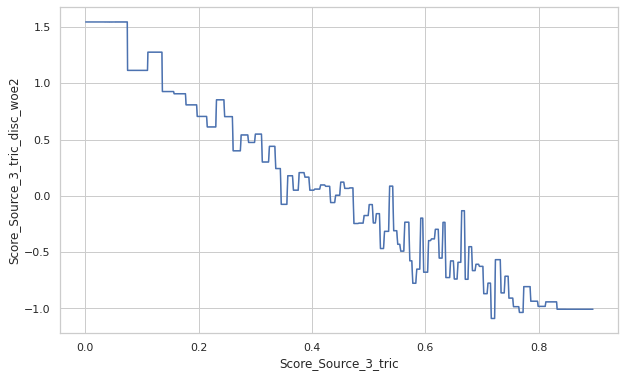

In [436]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')

In [437]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(X_train.Score_Source_3_tric_disc_woe2, sm.add_constant(X_train.Score_Source_3_tric_imp))
res = mod.fit(hasconst = False)
#print(res.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


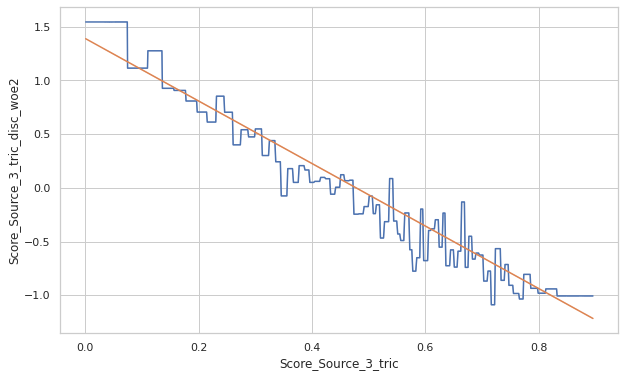

In [438]:

sns.lineplot(data=X_train, x="Score_Source_3_tric", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Score_Source_3_tric, y=res.predict(sm.add_constant(X_train.Score_Source_3_tric_imp)), palette = 'hls')


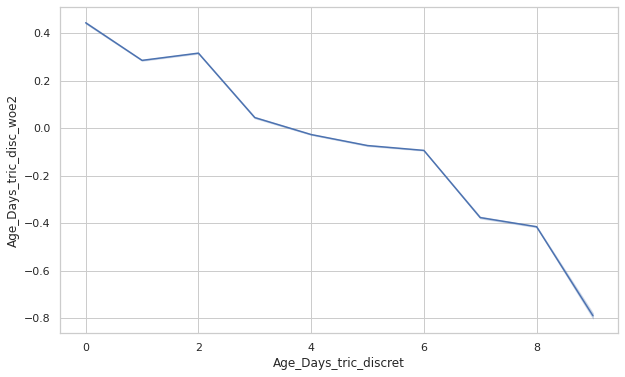

In [439]:
# Ratio del evento por tramo de la variable numérica
sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


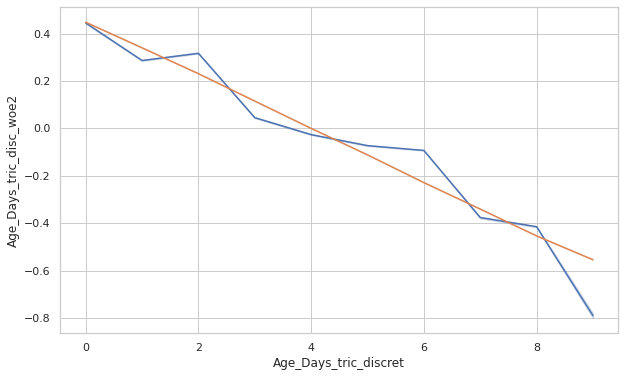

In [440]:
# Fit and summarize OLS model
mod = sm.OLS(X_train.Age_Days_tric_disc_woe2, sm.add_constant(X_train.Age_Days_tric_imp))
res = mod.fit(hasconst = False)

sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp)), palette = 'hls')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


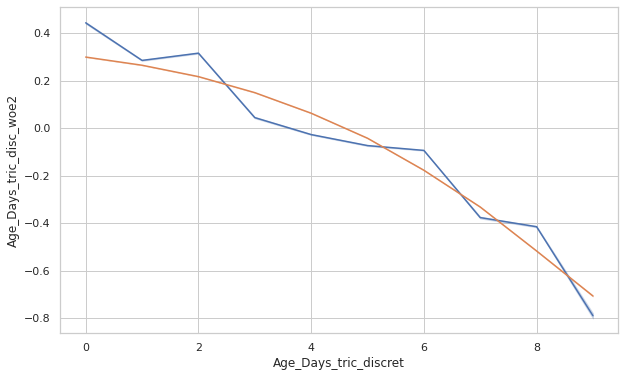

In [441]:
# Fit and summarize OLS model
from math import * 

def function(x):
  return x**3

mod = sm.OLS(X_train.Age_Days_tric_disc_woe2, 
             sm.add_constant(X_train.Age_Days_tric_imp.apply(lambda x: function(x))))
res = mod.fit(hasconst = False)

sns.lineplot(data=X_train, x="Age_Days_tric_discret", y="Age_Days_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Age_Days_tric_discret, y=res.predict(sm.add_constant(X_train.Age_Days_tric_imp.apply(lambda x: function(x)))), palette = 'hls')


<h3> Tratamiendo por transformaciones automáticas</h3>

In [442]:
f_numeric_features = [x for x in X_train.columns.tolist() if '_tric_imp' in x]
f_numeric_features

['Score_Source_3_tric_imp',
 'Score_Source_1_tric_imp',
 'Score_Source_2_tric_imp',
 'Employed_Days_tric_imp',
 'Age_Days_tric_imp',
 'Own_House_Age_tric_imp',
 'Phone_Change_tric_imp',
 'Social_Circle_Default_tric_imp',
 'Cleint_City_Rating_tric_imp',
 'Registration_Days_tric_imp',
 'Population_Region_Relative_tric_imp',
 'Application_Process_Hour_tric_imp',
 'Car_Owned_tric_imp',
 'Workphone_Working_tric_imp',
 'Credit_Amount_tric_imp',
 'Client_Income_tric_imp',
 'Credit_Bureau_tric_imp',
 'Child_Count_tric_imp',
 'Homephone_Tag_tric_imp']

In [443]:
# Calculando transformaciones
from math import * 

X_train[[x + '_cuadratic' for x in f_numeric_features]] = X_train[f_numeric_features].apply(lambda x: x**2)
X_train[[x + '_cubic' for x in f_numeric_features]] = X_train[f_numeric_features].apply(lambda x: x**3)

for col in f_numeric_features:
  X_train[col + '_sqrt'] = X_train[col].apply(lambda x: sqrt(x))
  X_train[col + '_log'] = X_train[col].apply(lambda x: log(x) if x > 0 else log(0.0001))


In [444]:
# Fitteando las transformaciones
for transformation in ['_cuadratic', '_cubic', '_sqrt', '_log']:
  for col in f_numeric_features:
    mod = sm.OLS(X_train[col.replace('_imp','') + '_disc_woe2'], 
                sm.add_constant(X_train[col + transformation]))
    res = mod.fit(hasconst = False)
    X_train[col + transformation + '_fitted'] = res.predict(sm.add_constant(X_train[col + transformation]))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


In [445]:
# Evaluando gini de las transformaciones

#transformed_features = [x for x in X_train.columns.tolist() if ('_fitted' in x) | ('_disc_woe' in x[-9:])]
transformed_features = [x for x in X_train.columns.tolist() if ('_fitted' in x) ]

ginis = [sklearn.metrics.roc_auc_score(X_train['Default'],
                                       X_train[col])*2-1 for col in transformed_features]

R2 = [X_train[[col, col.replace('_disc_woe','').replace('_imp_sqrt_fitted','').replace('_imp_cuadratic_fitted','').replace('_imp_cubic_fitted','').replace('_imp_log_fitted','') + '_disc_woe2']].corr().iloc[0][1] for col in transformed_features]

ginisTransformed = pd.DataFrame({'feature' : transformed_features,
                                 'gini' : ginis,
                                 'R2' : R2})


In [446]:
ginisTransformed

,feature,gini,R2
0,Score_Source_3_tric_imp_cuadratic_fitted,0.281581,0.904525
1,Score_Source_1_tric_imp_cuadratic_fitted,0.152179,0.909386
2,Score_Source_2_tric_imp_cuadratic_fitted,0.295250,0.936250
3,Employed_Days_tric_imp_cuadratic_fitted,0.181957,0.653813
4,Age_Days_tric_imp_cuadratic_fitted,0.153077,0.877466
...,...,...,...
71,Credit_Amount_tric_imp_log_fitted,0.041568,0.220268
72,Client_Income_tric_imp_log_fitted,0.039748,0.495369
73,Credit_Bureau_tric_imp_log_fitted,0.022642,0.699236
74,Child_Count_tric_imp_log_fitted,0.032330,0.999519


In [447]:

ginisTransformed[ginisTransformed['feature'].str.contains("Score_Source_3")]


,feature,gini,R2
0,Score_Source_3_tric_imp_cuadratic_fitted,0.281581,0.904525
19,Score_Source_3_tric_imp_cubic_fitted,0.281581,0.860824
38,Score_Source_3_tric_imp_sqrt_fitted,0.281581,0.917588
57,Score_Source_3_tric_imp_log_fitted,0.281581,0.784140


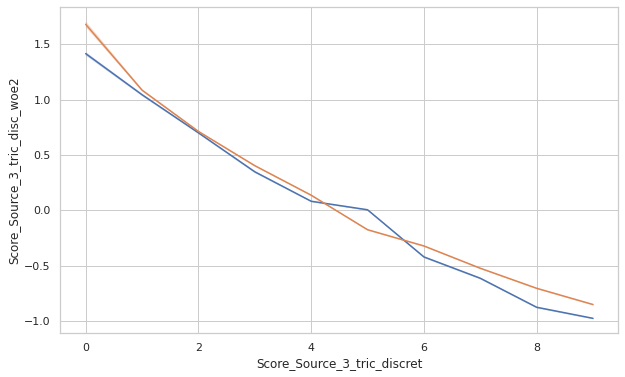

In [448]:
sns.lineplot(data=X_train, x="Score_Source_3_tric_discret", y="Score_Source_3_tric_disc_woe2", palette = 'hls')
sns.lineplot(x=X_train.Score_Source_3_tric_discret, y=X_train.Score_Source_3_tric_imp_sqrt_fitted, palette = 'hls')

In [449]:
original_features = list(set(x.replace('_tric_imp_cuadratic_fitted', '').
                       replace('_tric_imp_cubic_fitted', '').
                       replace('_tric_imp_sqrt_fitted', '').
                       replace('_tric_imp_log_fitted', '').
                       replace('_tric_disc_woe', '') for x in ginisTransformed.feature.tolist()))

In [450]:
original_features

['Score_Source_1',
 'Age_Days',
 'Credit_Bureau',
 'Employed_Days',
 'Car_Owned',
 'Score_Source_2',
 'Client_Income',
 'Cleint_City_Rating',
 'Social_Circle_Default',
 'Application_Process_Hour',
 'Score_Source_3',
 'Own_House_Age',
 'Registration_Days',
 'Credit_Amount',
 'Workphone_Working',
 'Child_Count',
 'Homephone_Tag',
 'Phone_Change',
 'Population_Region_Relative']

In [451]:

argmax_indexes = [ginisTransformed[ginisTransformed['feature'].str.contains(col)].R2.argmax() for col in original_features]
argmax_indexes

[0, 0, 3, 3, -1, 0, 1, -1, 0, 2, 2, 2, 0, 1, -1, 3, -1, 0, 0]

In [452]:
best_features = []

for x in original_features:
  location = ginisTransformed[ginisTransformed['feature'].str.contains(x)].R2.argmax()  
  best_features.append(ginisTransformed[ginisTransformed['feature'].str.contains(x)].iloc[location].feature)


In [453]:
best_features

['Score_Source_1_tric_imp_cuadratic_fitted',
 'Age_Days_tric_imp_cuadratic_fitted',
 'Credit_Bureau_tric_imp_log_fitted',
 'Employed_Days_tric_imp_log_fitted',
 'Car_Owned_tric_imp_log_fitted',
 'Score_Source_2_tric_imp_cuadratic_fitted',
 'Client_Income_tric_imp_cubic_fitted',
 'Cleint_City_Rating_tric_imp_log_fitted',
 'Social_Circle_Default_tric_imp_cuadratic_fitted',
 'Application_Process_Hour_tric_imp_sqrt_fitted',
 'Score_Source_3_tric_imp_sqrt_fitted',
 'Own_House_Age_tric_imp_sqrt_fitted',
 'Registration_Days_tric_imp_cuadratic_fitted',
 'Credit_Amount_tric_imp_cubic_fitted',
 'Workphone_Working_tric_imp_log_fitted',
 'Child_Count_tric_imp_log_fitted',
 'Homephone_Tag_tric_imp_log_fitted',
 'Phone_Change_tric_imp_cuadratic_fitted',
 'Population_Region_Relative_tric_imp_cuadratic_fitted']

## 6. Modelo 

In [454]:
best_cat_features = [x + '_woe' for x in categorical_features]
best_cat_features

['Accompany_Client_woe',
 'Client_Income_Type_woe',
 'Client_Education_woe',
 'Client_Marital_Status_woe',
 'Client_Gender_woe',
 'Loan_Contract_Type_woe',
 'Client_Housing_Type_woe',
 'Client_Occupation_woe',
 'Client_Permanent_Match_Tag_woe',
 'Client_Contact_Work_Tag_woe',
 'Type_Organization_woe']

In [455]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[best_features + best_cat_features]))
res = mod.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.254649
         Iterations 11


In [456]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85272
Method:                           MLE   Df Model:                           26
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                 0.09276
Time:                        15:16:18   Log-Likelihood:                -21721.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Score_Source_1_tric_imp_cuadratic_fitted                 0.4638      0.045     10.370      0.000       0.376       0.551
Age_D

In [458]:
len(best_features + best_cat_features)

30

In [ ]:
from itertools import combinations

result = combinations(best_features + best_cat_features, 4)


In [ ]:
gini_models = []
combination = []

for featuresToreg in result:
  try:
    mod = sm.Logit(y_train, sm.add_constant(X_train[list(featuresToreg)]))
    res = mod.fit()
    gini_models.append(sklearn.metrics.roc_auc_score(X_train['Default'], res.predict(sm.add_constant(X_train[list(featuresToreg)])))*2-1)
    combination.append(list(featuresToreg))
  except:
    print('error')


In [ ]:
pd.options.display.max_colwidth = 1000
pd.DataFrame({'combination' : combination[:3711],
              'gini' : gini_models}).sort_values(by = 'gini', ascending=False).head(10)

,combination,gini
2563,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Client_Education_woe]",0.424198
1751,"[Employed_Days_tric_imp_log_fitted, Score_Source_1_tric_imp_cuadratic_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted]",0.422485
2568,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Client_Occupation_woe]",0.418955
2571,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Type_Organization_woe]",0.416768
2565,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Client_Gender_woe]",0.414967
784,"[Employed_Days_tric_imp_log_fitted, Own_House_Age_tric_imp_sqrt_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted]",0.411116
2566,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Loan_Contract_Type_woe]",0.410685
1542,"[Employed_Days_tric_imp_log_fitted, Social_Circle_Default_tric_imp_cuadratic_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted]",0.409303
1311,"[Employed_Days_tric_imp_log_fitted, Client_Income_tric_imp_cubic_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted]",0.409033
2562,"[Employed_Days_tric_imp_log_fitted, Score_Source_2_tric_imp_cuadratic_fitted, Score_Source_3_tric_imp_sqrt_fitted, Client_Income_Type_woe]",0.408776


In [ ]:
best_model = pd.DataFrame({'combination' : combination[:3711],
              'gini' : gini_models}).sort_values(by = 'gini', ascending=False).iloc[0][0]
best_model

['Employed_Days_tric_imp_log_fitted',
 'Score_Source_2_tric_imp_cuadratic_fitted',
 'Score_Source_3_tric_imp_sqrt_fitted',
 'Client_Education_woe']

In [484]:
best_features + best_cat_features

['Score_Source_1_tric_imp_cuadratic_fitted',
 'Age_Days_tric_imp_cuadratic_fitted',
 'Credit_Bureau_tric_imp_log_fitted',
 'Employed_Days_tric_imp_log_fitted',
 'Car_Owned_tric_imp_log_fitted',
 'Score_Source_2_tric_imp_cuadratic_fitted',
 'Client_Income_tric_imp_cubic_fitted',
 'Cleint_City_Rating_tric_imp_log_fitted',
 'Social_Circle_Default_tric_imp_cuadratic_fitted',
 'Application_Process_Hour_tric_imp_sqrt_fitted',
 'Score_Source_3_tric_imp_sqrt_fitted',
 'Own_House_Age_tric_imp_sqrt_fitted',
 'Registration_Days_tric_imp_cuadratic_fitted',
 'Credit_Amount_tric_imp_cubic_fitted',
 'Workphone_Working_tric_imp_log_fitted',
 'Child_Count_tric_imp_log_fitted',
 'Homephone_Tag_tric_imp_log_fitted',
 'Phone_Change_tric_imp_cuadratic_fitted',
 'Population_Region_Relative_tric_imp_cuadratic_fitted',
 'Accompany_Client_woe',
 'Client_Income_Type_woe',
 'Client_Education_woe',
 'Client_Marital_Status_woe',
 'Client_Gender_woe',
 'Loan_Contract_Type_woe',
 'Client_Housing_Type_woe',
 'Client_

In [487]:
modelo = ['Employed_Days_tric_imp_log_fitted',
          'Score_Source_1_tric_imp_cuadratic_fitted',
          'Score_Source_2_tric_imp_cuadratic_fitted',
          'Score_Source_3_tric_imp_sqrt_fitted',
          'Client_Education_woe',
          'Client_Gender_woe',
          'Loan_Contract_Type_woe',
          'Client_Occupation_woe',
          'Client_Permanent_Match_Tag_woe',
          'Type_Organization_woe']

In [489]:

mod = sm.Logit(y_train, sm.add_constant(X_train[modelo]))
modelo_fitted = mod.fit()
print(modelo_fitted.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.255361
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                85299
Model:                          Logit   Df Residuals:                    85288
Method:                           MLE   Df Model:                           10
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                 0.09022
Time:                        15:40:27   Log-Likelihood:                -21782.
converged:                       True   LL-Null:                       -23942.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4

<h3> Revisión de correlaciones </h3>

In [ ]:
X_train[best_model].corr()

,Employed_Days_tric_imp_log_fitted,Score_Source_2_tric_imp_cuadratic_fitted,Score_Source_3_tric_imp_sqrt_fitted,Client_Education_woe
Employed_Days_tric_imp_log_fitted,1.000000,0.054357,0.124949,-0.071732
Score_Source_2_tric_imp_cuadratic_fitted,0.054357,1.000000,0.088942,0.131881
Score_Source_3_tric_imp_sqrt_fitted,0.124949,0.088942,1.000000,-0.023561
Client_Education_woe,-0.071732,0.131881,-0.023561,1.000000


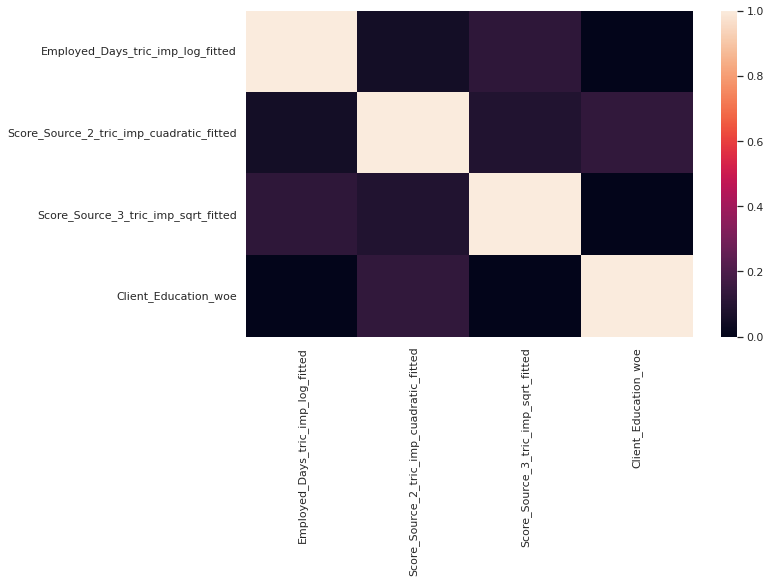

In [ ]:

sns.heatmap(X_train[best_model].corr(), vmin=0, vmax=1)


## 7. Implementación

In [464]:
# Target Encoding
from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()
WOEEncoder = encoder.fit(X_train[categorical_features], X_train['Default'])

In [468]:
# Usando reglas de encoding
X_test[categorical_features] = X_test[categorical_features].replace(np.nan,'missing')
X_test[[x + '_woe' for x in categorical_features]] = WOEEncoder.transform(X_test[categorical_features])


In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_test[col + '_tric'] = X_test[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_test.head()

In [ ]:
#Tratamiento de missings

X_test[[x + '_imp' for x in [col + '_tric' for col in univariate_II.feature.tolist()]]] = imp_mean.transform(X_test[[col + '_tric' for col in univariate_II.feature.tolist()]])
X_test[[x + '_imp' for x in [col + '_tric' for col in univariate_II.feature.tolist()]]].head()


In [480]:
# Calculando transformaciones

X_test['Score_Source_1_tric_imp_cuadratic'] = X_test['Score_Source_1_tric_imp'].apply(lambda x: x**2)
X_test['Score_Source_2_tric_imp_cuadratic'] = X_test['Score_Source_2_tric_imp'].apply(lambda x: x**2)
X_test['Score_Source_3_tric_imp_sqrt'] = X_test['Score_Source_3_tric_imp'].apply(lambda x: sqrt(x))
X_test['Employed_Days_tric_imp_log'] = X_test['Employed_Days_tric_imp'].apply(lambda x: log(x) if x > 0 else log(0.0001))



In [330]:
features_mod = ['Score_Source_1_tric_imp', 
                'Score_Source_2_tric_imp', 
                'Score_Source_3_tric_imp', 
                'Employed_Days_tric_imp']

In [478]:
# Fitteando las transformaciones
for transformation in ['_cuadratic', '_sqrt', '_log']:
  for col in features_mod:
    mod = sm.OLS(X_train[col.replace('imp','') + 'disc_woe2'], 
                 sm.add_constant(X_train[col + transformation]))
    res = mod.fit(hasconst = False)
    print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

                                  OLS Regression Results                                 
Dep. Variable:     Score_Source_1_tric_disc_woe2   R-squared:                       0.827
Model:                                       OLS   Adj. R-squared:                  0.827
Method:                            Least Squares   F-statistic:                 4.077e+05
Date:                           Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                                   15:23:42   Log-Likelihood:                 30596.
No. Observations:                          85299   AIC:                        -6.119e+04
Df Residuals:                              85297   BIC:                        -6.117e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

                                  OLS Regression Results                                 
Dep. Variable:     Score_Source_3_tric_disc_woe2   R-squared:                       0.842
Model:                                       OLS   Adj. R-squared:                  0.842
Method:                            Least Squares   F-statistic:                 4.544e+05
Date:                           Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                                   15:23:42   Log-Likelihood:                 10420.
No. Observations:                          85299   AIC:                        -2.084e+04
Df Residuals:                              85297   BIC:                        -2.082e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---

In [483]:

X_test['Score_Source_1_tric_imp_cuadratic_fitted'] = -2.5973*X_test.Score_Source_1_tric_imp_cuadratic + 0.6469
X_test['Score_Source_2_tric_imp_cuadratic_fitted'] = -3.0359*X_test.Score_Source_2_tric_imp_cuadratic + 0.8030
X_test['Score_Source_3_tric_imp_sqrt_fitted'] = -3.5878*X_test.Score_Source_3_tric_imp_sqrt + 2.4178
X_test['Employed_Days_tric_imp_log_fitted'] = -0.2486*X_test.Employed_Days_tric_imp_log + 1.8668


In [496]:
# Usando el modelo para predecir

X_test['XB'] = (-2.4265 + X_test['Score_Source_2_tric_imp_cuadratic_fitted']*0.8638 
                        + X_test['Score_Source_3_tric_imp_sqrt_fitted']*0.8171 
                        + X_test['Employed_Days_tric_imp_log_fitted']*0.4190
                        + X_test['Score_Source_1_tric_imp_cuadratic_fitted']*0.4973 
                        + X_test['Client_Education_woe']*0.7127 
                        + X_test['Client_Gender_woe']*0.4495 
                        + X_test['Loan_Contract_Type_woe']*1.0069 
                        + X_test['Client_Occupation_woe']*0.2775 
                        + X_test['Client_Permanent_Match_Tag_woe']*0.3429 
                        + X_test['Type_Organization_woe']*0.5067)

X_test['PD'] = X_test.XB.apply(lambda x: 1/(1 + exp(-x)))

In [497]:
# Usando el modelo para predecir

X_train['XB'] = (-2.4265 + X_train['Score_Source_2_tric_imp_cuadratic_fitted']*0.8638 
                        + X_train['Score_Source_3_tric_imp_sqrt_fitted']*0.8171 
                        + X_train['Employed_Days_tric_imp_log_fitted']*0.4190
                        + X_train['Score_Source_1_tric_imp_cuadratic_fitted']*0.4973 
                        + X_train['Client_Education_woe']*0.7127 
                        + X_train['Client_Gender_woe']*0.4495 
                        + X_train['Loan_Contract_Type_woe']*1.0069 
                        + X_train['Client_Occupation_woe']*0.2775 
                        + X_train['Client_Permanent_Match_Tag_woe']*0.3429 
                        + X_train['Type_Organization_woe']*0.5067)

X_train['PD'] = X_train.XB.apply(lambda x: 1/(1 + exp(-x)))

In [500]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metrics = pd.DataFrame({'metric':['AUC','Gini'],
                                'logit_train':[roc_auc_score(y_train, X_train.PD),
                                              (roc_auc_score(y_train, X_train.PD)*2-1)],
                                'logit_test':[roc_auc_score(y_test, X_test.PD),
                                              (roc_auc_score(y_test, X_test.PD)*2-1)]})
metrics

,metric,logit_train,logit_test
0,AUC,0.725210,0.7274
1,Gini,0.450419,0.4548


In [501]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

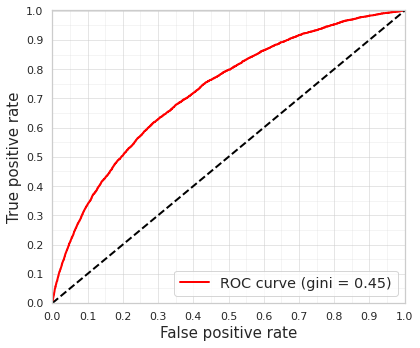

In [502]:
import matplotlib.pyplot as plt
plot_roc_curve(y_train, X_train.PD, width=6, height=5)

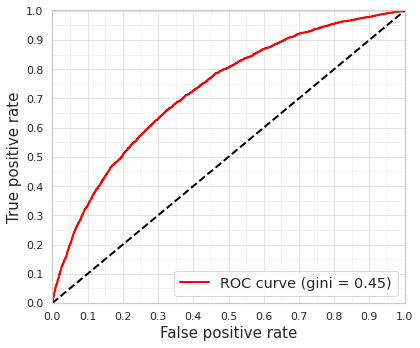

In [503]:
import matplotlib.pyplot as plt
plot_roc_curve(y_test, X_test.PD, width=6, height=5)

---
## Gracias por completar este laboratorio!